# Hierarchical Clustering and BFR on FMA Dataset
This notebook performs clustering on a small subset (8000 songs) of the FMA dataset using Agglomerative Hierarchical Clustering, calculates cluster metrics, and applies KMeans as an approximation of the BFR algorithm on the full dataset.

## 1. Load and Preprocess Data
Load and normalize feature vectors of the 8000-song 'small' subset from the FMA dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

features_df = pd.read_csv("./fma_metadata/features.csv", index_col=0)
features_df.head()


/tmp/ipykernel_126691/1392367968.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,

,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
feature,,,,,,,,,,,,,,,,,,,,,
statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
number,01,02,03,04,05,06,07,08,09,10,...,04,05,06,01,01,01,01,01,01,01
track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,1.3412306309e+00,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,6.1918509007e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02


In [2]:
tracks_df = pd.read_csv("./fma_metadata/tracks.csv", header=[0, 1], index_col=0)
tracks_df.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

### Tracks subset values

In [3]:
tracks_df[("set", "subset")].value_counts()

(set, subset)
large     81574
medium    17000
small      8000
Name: count, dtype: int64

### Filter to the "small" subset

In [4]:
small_tracks = tracks_df[tracks_df[('set', 'subset')] == 'small']

# Ensure that the indices in small_tracks exist in features_df
valid_indices = small_tracks.index.intersection(features_df.index)
features_small = features_df.loc[valid_indices]

features_small.head()



,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
1417,0.065994,-0.680094,-0.669625,-0.236656,-0.600461,-0.057299,-0.44844,-0.181044,-0.1358,-0.844363,...,0.087356,0.016735,0.020539,17.890446,0.298828,0.045036,0.04248,0.0,2.829784,0.021915
1427,-0.039916,0.982262,0.114697,-0.261281,0.149939,-0.12924,0.641334,3.904938,0.119851,-0.19753,...,0.079824,0.016845,0.017169,2.337646,0.158691,0.036107,0.033691,0.0,1.072598,0.012802
1443,10.359983,1.110723,4.393135,1.577551,1.943735,0.475169,-0.345988,-0.119972,-0.708067,0.180411,...,0.054925,0.017123,0.016755,4.98189,0.138672,0.032036,0.03125,0.0,1.104205,0.008669
1482,1.12024,2.521075,-1.388268,-0.868038,-1.016607,-0.037738,-1.222496,-1.319281,-1.090184,0.69152,...,0.0828,0.016605,0.020321,493.430145,0.645508,0.011081,0.008301,0.003418,20.920746,0.025132
1510,-0.78459,-0.660797,-0.869874,-0.62426,0.0275,0.548069,-0.108645,-0.591097,-0.477322,-0.187866,...,0.134728,0.027714,0.02633,0.399877,0.616699,0.13446,0.055664,0.0,1.33133,0.151181


### Normalize Features

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(features_small.fillna(0))
X.shape

/tmp/ipykernel_126691/1052660902.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = scaler.fit_transform(features_small.fillna(0))


(7918, 518)

## 2. PCA Visualization
Apply Principal Component Analysis (PCA) to reduce dimensionality and visualize the distribution of the `small` subset in 2D space.

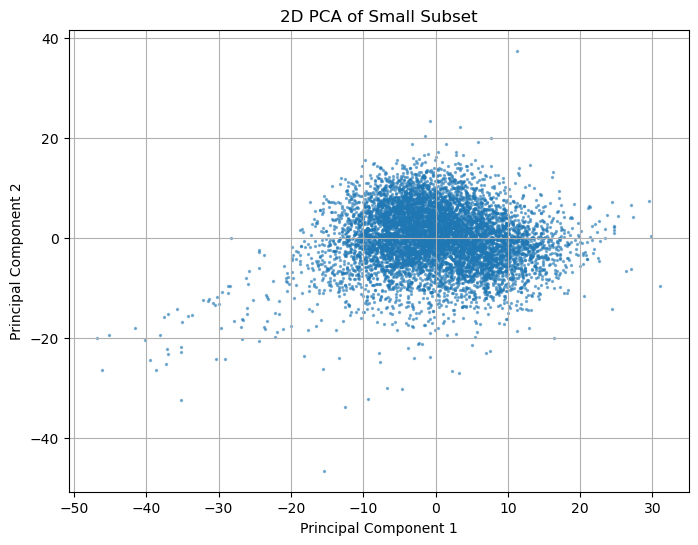

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=2, alpha=0.5)
plt.title("2D PCA of Small Subset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## 3. Agglomerative Hierarchical Clustering

Perform Agglomerative Clustering for values of `k` between 8 and 16. For each clustering, we compute:

- **Radius**: average distance from each point to its nearest neighbor.
- **Diameter**: maximum pairwise distance within the cluster.
- **Density**: points per unit volume (inversely affected by radius).

These help assess the compactness and spread of clusters.


In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist

results = []

def compute_metrics(cluster_data):
    if len(cluster_data) < 2:
        return 0, 0, 0
    dists = cdist(cluster_data, cluster_data)
    radius = np.mean(np.min(dists + np.eye(dists.shape[0]) * 1e6, axis=1))
    diameter = np.max(dists)
    density = len(cluster_data) / (1 + radius**2)
    return radius, diameter, density

for k in range(8, 17):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)
    metrics = []
    for cluster_id in range(k):
        cluster_points = X[labels == cluster_id]
        radius, diameter, density = compute_metrics(cluster_points)
        metrics.append((radius, diameter, density))
    avg_radius = np.mean([m[0] for m in metrics])
    avg_diameter = np.mean([m[1] for m in metrics])
    avg_density = np.mean([m[2] for m in metrics])
    results.append((k, avg_radius, avg_diameter, avg_density))

metrics_df = pd.DataFrame(results, columns=['k', 'avg_radius', 'avg_diameter', 'avg_density'])
metrics_df


,k,avg_radius,avg_diameter,avg_density
0,8,17.906934,100.025158,3.251994
1,9,15.737762,81.170835,2.891413
2,10,21.401939,81.491098,2.639848
3,11,21.097786,80.599070,2.396220
4,12,20.893773,80.699535,2.194645
5,13,20.892829,80.289235,2.028958
6,14,20.570071,78.576325,1.878599
7,15,21.312290,80.220686,1.753466
8,16,20.960413,78.376229,1.642274


## 3b. PCA Visualization of Agglomerative Clustering for Different k

Visualize how clustering changes with different k values in 2D PCA space

/tmp/ipykernel_126691/4237565611.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")
/tmp/ipykernel_126691/4237565611.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")
/tmp/ipykernel_126691/4237565611.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")
/tmp/ipykernel_126691/4237565611.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will

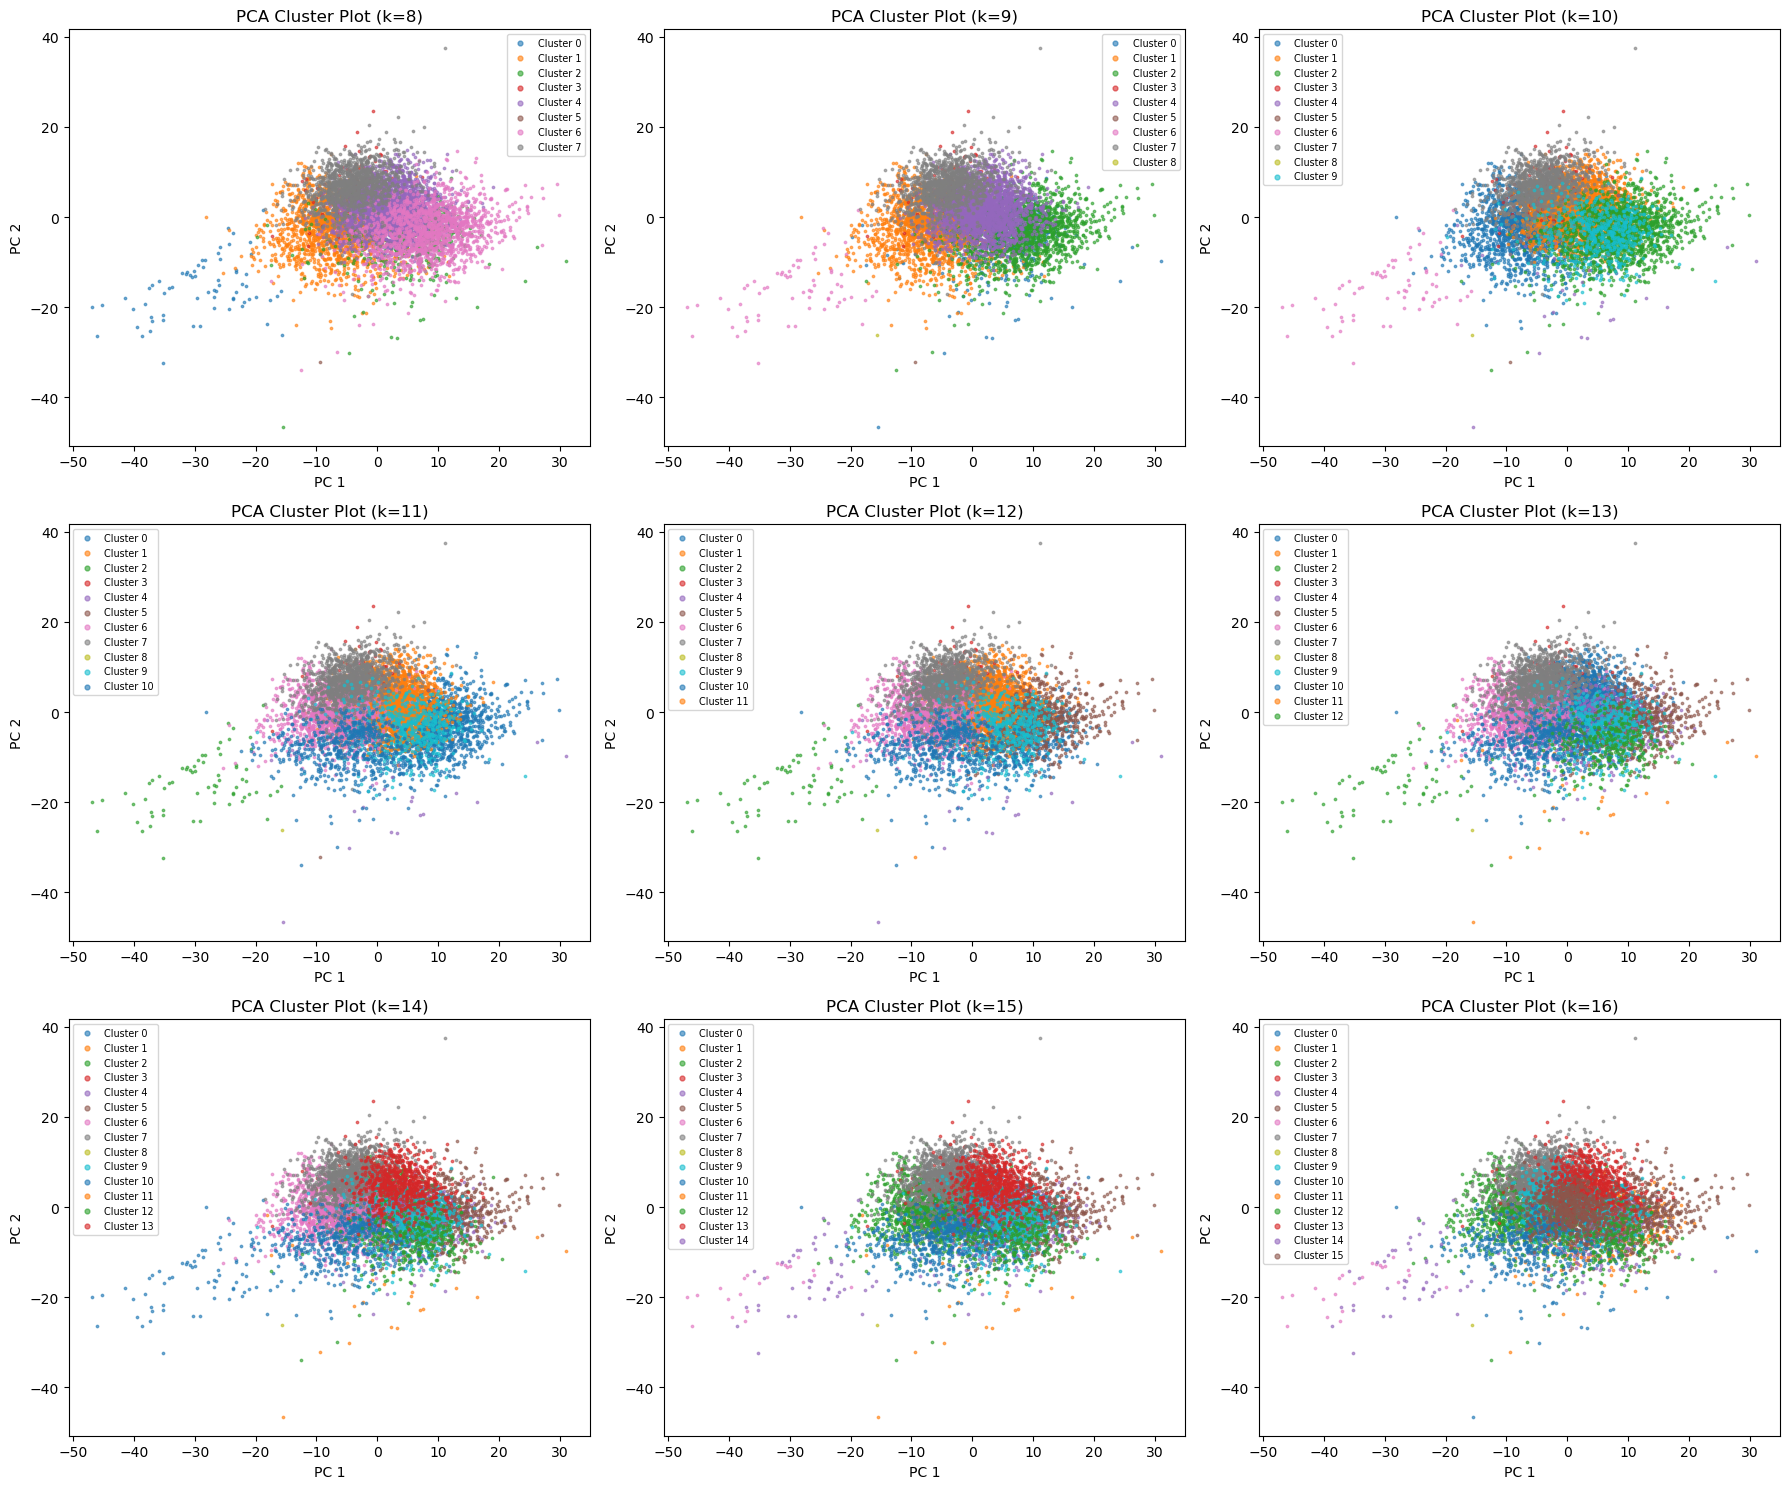

In [ ]:
from matplotlib.cm import get_cmap

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

for idx, k in enumerate(range(8, 17)):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)

    cmap = get_cmap("tab10")
    for cluster_id in range(k):
        cluster_points = X_pca[labels == cluster_id]
        axs[idx].scatter(cluster_points[:, 0], cluster_points[:, 1],
                         s=3, alpha=0.6, label=f'Cluster {cluster_id}', color=cmap(cluster_id % 10))
    
    axs[idx].set_title(f"PCA Cluster Plot (k={k})")
    axs[idx].set_xlabel("PC 1")
    axs[idx].set_ylabel("PC 2")
    axs[idx].legend(markerscale=2, fontsize='x-small', loc='best')

plt.tight_layout()
plt.show()


## 4. Visualization of Cluster Metrics

The following plots show how average radius, diameter, and density vary with the number of clusters `k`. A good choice of `k` typically balances compact clusters (low radius/diameter) and high density.

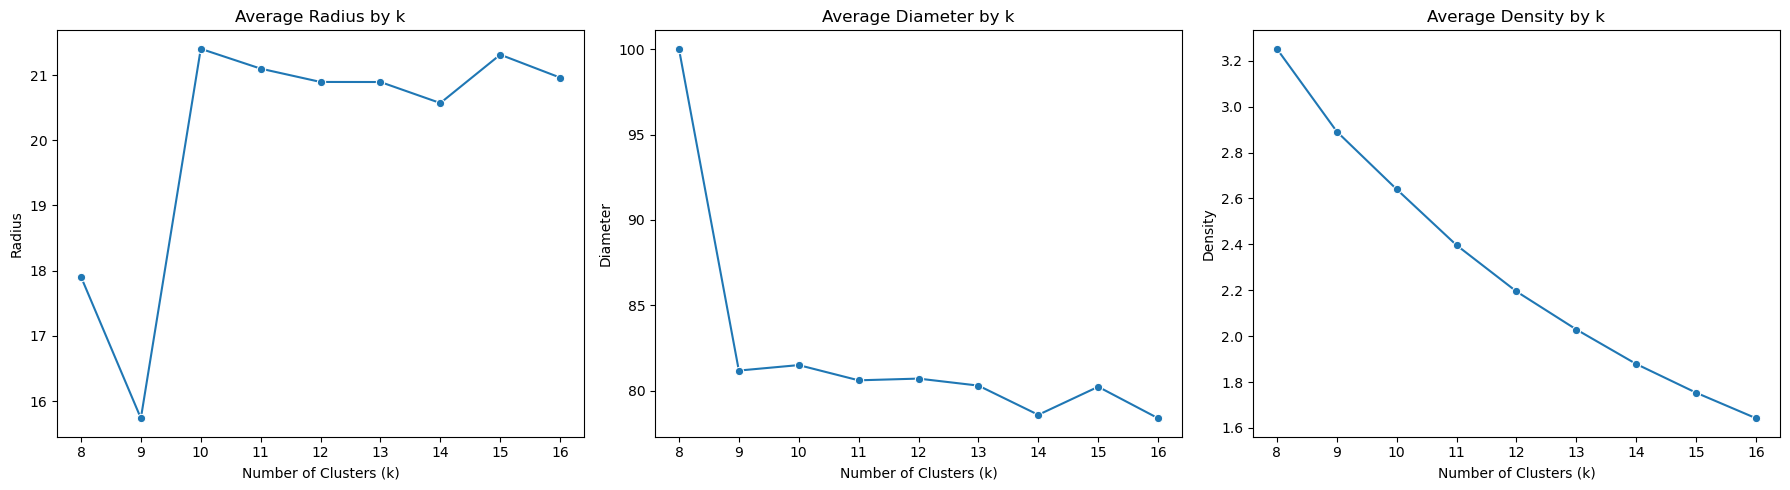

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.lineplot(data=metrics_df, x='k', y='avg_radius', ax=ax[0], marker="o")
ax[0].set_title('Average Radius by k')
ax[0].set_xlabel("Number of Clusters (k)")
ax[0].set_ylabel("Radius")

sns.lineplot(data=metrics_df, x='k', y='avg_diameter', ax=ax[1], marker="o")
ax[1].set_title('Average Diameter by k')
ax[1].set_xlabel("Number of Clusters (k)")
ax[1].set_ylabel("Diameter")

sns.lineplot(data=metrics_df, x='k', y='avg_density', ax=ax[2], marker="o")
ax[2].set_title('Average Density by k')
ax[2].set_xlabel("Number of Clusters (k)")
ax[2].set_ylabel("Density")

plt.tight_layout()
plt.show()

## 5. Apply KMeans as BFR Approximation

Approximate the BFR clustering on the **entire FMA dataset** using KMeans. The number of clusters (`k`) is selected based on the highest density from hierarchical clustering results.

In [10]:
from sklearn.cluster import KMeans

# Load full feature dataset
features_full = pd.read_csv("./fma_metadata/features.csv", index_col=0, skiprows=range(1, 4))
X_full = StandardScaler().fit_transform(features_full.fillna(0))

optimal_k = int(metrics_df.loc[metrics_df['avg_density'].idxmax(), 'k'])
print(f"Using optimal k = {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
full_labels = kmeans.fit_predict(X_full)

Using optimal k = 8


## 6. Summarize Clusters Using Genre Metadata

Merge cluster assignments with genre information and identify the most common (top) genre in each cluster. This allows interpretation of the content and coherence of each cluster.

In [11]:
genre_map_full = tracks_df[('track', 'genre_top')]
metadata_full = pd.DataFrame({'genre': genre_map_full, 'cluster': full_labels})
metadata_full.dropna(inplace=True)

# Find top genre per cluster
genre_summary = metadata_full.groupby('cluster')['genre'].agg(
    lambda x: x.value_counts().idxmax()
).reset_index().rename(columns={'genre': 'top_genre'})

# Distribution of genres across clusters
genre_counts = metadata_full.groupby(['cluster', 'genre']).size().reset_index(name='count')
genre_distribution = genre_counts.pivot(index='cluster', columns='genre', values='count').fillna(0)

genre_summary


,cluster,top_genre
0,0,Electronic
1,1,Experimental
2,2,Experimental
3,3,Rock
4,4,Rock
5,5,Electronic
6,6,Rock
7,7,Experimental


## 7. Visualize Genre Distribution

This heatmap shows how genres are distributed across clusters. Each row corresponds to a cluster and each column to a genre, with intensity showing the number of tracks of that genre in that cluster.

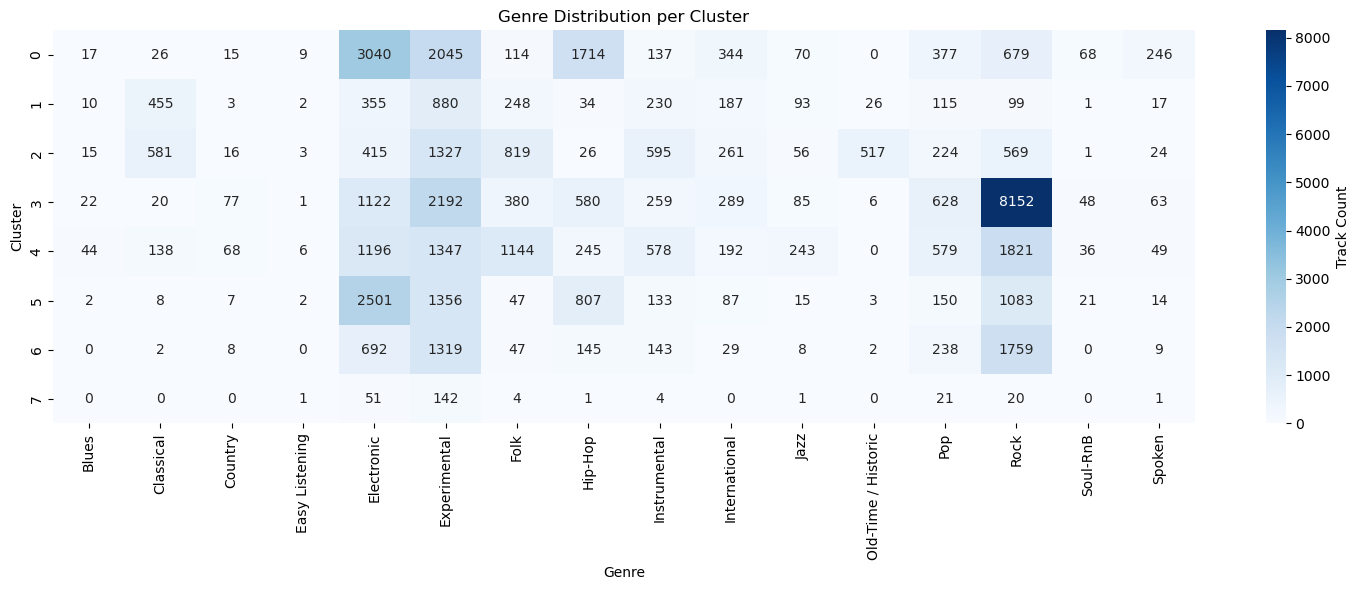

In [12]:
plt.figure(figsize=(15, 6))
sns.heatmap(genre_distribution, cmap="Blues", annot=True, fmt=".0f", cbar_kws={"label": "Track Count"})
plt.title("Genre Distribution per Cluster")
plt.ylabel("Cluster")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

## Conclusion
- Filtered the dataset to the `'small'` subset for hierarchical clustering.
- Computed radius, diameter, and density to evaluate clusters.
- Selected optimal `k` and applied KMeans on the full dataset as a BFR approximation.
- Identified top genres per cluster and visualized genre distribution.

Next steps could include improving BFR with Mahalanobis distance or evaluating cluster quality using silhouette score or purity.